<a href="https://colab.research.google.com/github/Ultan-Kearns/ZTM-Tensorflow-Developer-Certificate/blob/master/03_introduction_to_computer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision with Tensorflow

Computer vision is the practice of writing algorithmes which can discover patterns within visual data.  Such as a camera of a self-driving car recognizing the car in front

## Get the data


In [104]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
# unzip
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-04-09 20:37:36--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.207, 142.251.2.207, 2607:f8b0:4023:c0d::cf, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.2’

pizza_steak.zip.2   100%[===================>] 104.47M   163MB/s    in 0.6s    

2024-04-09 20:37:37 (163 MB/s) - ‘pizza_steak.zip.2’ saved [109540975/109540975]



The images we're working with are from the Food101 dataset(101 different classes of food): https://kaggle.com/dansbecker/food101

However we've modified it to use only two classes(pizza & steak) using the image data modification notebook https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

**Note** We start with a smaller dataset so that we can experiment quickly so we can figure out what works and what doesn't work before scaling up.

## Inspect the data (become one with it)
A very crucial step at the beginning of any machine learning project is becoming one with the dataset

And for computer vision project.... this usually means visualizing many smamples of your data.

In [105]:
!ls pizza_steak

test  train


In [106]:
!ls pizza_steak/train

pizza  steak


In [107]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [108]:
import os

# walk through the pizza_steak directory and list the number of files

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [109]:
# Another way to find out how many images are in a file

num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images first let's get the class names programmatically

In [110]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # created a list of class names from sub directories
print(class_names)

['pizza' 'steak']


In [111]:
# Let's visualize our images

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  # Set up the target directory(we'll view images from here)
  target_folder = target_dir+"/"+target_class
  # Get the random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  # Read in image and plot using matplot lib
  img = mpimg.imread(target_folder + "/" +random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape: {img.shape}")
  return img

Image shape: (512, 512, 3)


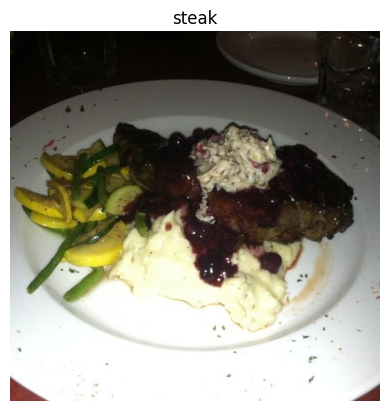

In [112]:
# View random image from the dataset
classes = ["pizza","steak"]
img = view_random_image("pizza_steak/train",classes[random.randint(0,1)])

In [113]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 47,  41,  25],
        [ 52,  46,  30],
        [ 48,  45,  30],
        ...,
        [  5,   5,   3],
        [  5,   5,   3],
        [  4,   4,   2]],

       [[ 41,  35,  19],
        [ 49,  43,  27],
        [ 48,  45,  30],
        ...,
        [  7,   7,   5],
        [  7,   7,   5],
        [  7,   7,   5]],

       [[ 34,  28,  12],
        [ 44,  38,  22],
        [ 45,  42,  27],
        ...,
        [  5,   6,   1],
        [  5,   6,   1],
        [  5,   6,   1]],

       ...,

       [[130,  57,  50],
        [130,  57,  50],
        [130,  57,  50],
        ...,
        [ 91,  40,  36],
        [ 91,  40,  36],
        [ 90,  39,  35]],

       [[130,  60,  50],
        [130,  60,  50],
        [129,  59,  49],
        ...,
        [ 91,  38,  34],
        [ 92,  39,  35],
        [ 93,  40,  36]],

       [[126,  56,  46],
        [125,  55,  45],
        [124,  54,  44],
        ...,
        [ 92,  37,  3

In [114]:
# View the image shape
img.shape # returns width, heigh, colour channels

(512, 512, 3)

In [115]:
img / 255.

array([[[0.18431373, 0.16078431, 0.09803922],
        [0.20392157, 0.18039216, 0.11764706],
        [0.18823529, 0.17647059, 0.11764706],
        ...,
        [0.01960784, 0.01960784, 0.01176471],
        [0.01960784, 0.01960784, 0.01176471],
        [0.01568627, 0.01568627, 0.00784314]],

       [[0.16078431, 0.1372549 , 0.0745098 ],
        [0.19215686, 0.16862745, 0.10588235],
        [0.18823529, 0.17647059, 0.11764706],
        ...,
        [0.02745098, 0.02745098, 0.01960784],
        [0.02745098, 0.02745098, 0.01960784],
        [0.02745098, 0.02745098, 0.01960784]],

       [[0.13333333, 0.10980392, 0.04705882],
        [0.17254902, 0.14901961, 0.08627451],
        [0.17647059, 0.16470588, 0.10588235],
        ...,
        [0.01960784, 0.02352941, 0.00392157],
        [0.01960784, 0.02352941, 0.00392157],
        [0.01960784, 0.02352941, 0.00392157]],

       ...,

       [[0.50980392, 0.22352941, 0.19607843],
        [0.50980392, 0.22352941, 0.19607843],
        [0.50980392, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images.  More specifically we need a way to:

* Load our images
* Pre process our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [65]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the random seed
tf.random.set_seed(42)

# Preprocess data(get all pixel values between 1 & 0, also called scaling / normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir="/content/pizza_steak/test"
# Import data from directories and turn it into batches

train_data = train_datagen.flow_from_directory(train_dir,batch_size=32, target_size=(224,224), class_mode="binary",seed=42)
valid_data = valid_datagen.flow_from_directory(test_dir,batch_size=32,target_size=(224,224),class_mode="binary",seed=42)

# Build a CNN model (Same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 20s 386ms/step - loss: 0.5706 - accuracy: 0.6913 - val_loss: 0.3934 - val_accuracy: 0.8180
Epoch 2/5
47/47 [==============================] - 14s 286ms/step - loss: 0.4617 - accuracy: 0.7920 - val_loss: 0.3598 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 6s 119ms/step - loss: 0.4154 - accuracy: 0.8113 - val_loss: 0.3629 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 8s 165ms/step - loss: 0.3712 - accuracy: 0.8380 - val_loss: 0.3380 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 6s 136ms/step - loss: 0.3220 - accuracy: 0.8627 - val_loss: 0.2940 - val_accuracy: 0.8820


**Note:** If the above cell is taking longer than ~10 seconds per epoch make sure you're using a GPU runtime

In [66]:
# Get model summary
model_1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_15 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_17 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 53, 53, 10)        0         
 ng2D)                                                

## Using the same model as before

Let's replicate the model we've built in a previous section to see if it works with our image data

The model we're building is from the [tensorflow playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.94210&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

In [67]:
# set random seed
tf.random.set_seed(42)

# create the model  to replicate Tensorflow Playground Model

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
# compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model

history_2 = model_2.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 201ms/step - loss: 0.7663 - accuracy: 0.5027 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 6s 119ms/step - loss: 0.6927 - accuracy: 0.5007 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 11s 246ms/step - loss: 0.6927 - accuracy: 0.5007 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 6s 125ms/step - loss: 0.6927 - accuracy: 0.5007 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 6s 123ms/step - loss: 0.6927 - accuracy: 0.5007 - val_loss: 0.6932 - val_accuracy: 0.5000


In [116]:
# set random seed
tf.random.set_seed(42)

my_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
# compile the model
my_model.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model

history_3 = my_model.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 140ms/step - loss: 0.6246 - accuracy: 0.6413 - val_loss: 0.5267 - val_accuracy: 0.7240
Epoch 2/5
47/47 [==============================] - 6s 129ms/step - loss: 0.4878 - accuracy: 0.7547 - val_loss: 0.4479 - val_accuracy: 0.7860
Epoch 3/5
47/47 [==============================] - 7s 159ms/step - loss: 0.4410 - accuracy: 0.7893 - val_loss: 0.3903 - val_accuracy: 0.8180
Epoch 4/5
47/47 [==============================] - 6s 125ms/step - loss: 0.4189 - accuracy: 0.8200 - val_loss: 0.4055 - val_accuracy: 0.8120
Epoch 5/5
47/47 [==============================] - 6s 136ms/step - loss: 0.3755 - accuracy: 0.8393 - val_loss: 0.4016 - val_accuracy: 0.8280
Epoch 1/5
47/47 [==============================] - 9s 160ms/step - loss: 1.9955 - accuracy: 0.5553 - val_loss: 0.6782 - val_accuracy: 0.5280
Epoch 2/5
47/47 [==============================] - 6s 122ms/step - loss: 0.6540 - accuracy: 0.6273 - val_loss: 0.5832 - val_accuracy: 0.7240
Epoch 3/5
47/

In [117]:
model_2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 150528)            0         
                                                                 
 dense_15 (Dense)            (None, 4)                 602116    
                                                                 
 dense_16 (Dense)            (None, 4)                 20        
                                                                 
 dense_17 (Dense)            (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #

Despite having 20x more parameters than our original CNN, the model performs terribly... let's try again

In [118]:
# set random seed
tf.random.set_seed(42)

# create the model  to replicate Tensorflow Playground Model

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
# compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model

history_3 = model_3.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 116ms/step - loss: 3.2153 - accuracy: 0.6313 - val_loss: 1.2334 - val_accuracy: 0.6360
Epoch 2/5
47/47 [==============================] - 6s 128ms/step - loss: 1.1614 - accuracy: 0.6653 - val_loss: 0.6752 - val_accuracy: 0.6860
Epoch 3/5
47/47 [==============================] - 5s 108ms/step - loss: 0.6005 - accuracy: 0.7280 - val_loss: 0.4669 - val_accuracy: 0.7720
Epoch 4/5
47/47 [==============================] - 6s 124ms/step - loss: 0.5404 - accuracy: 0.7593 - val_loss: 0.4671 - val_accuracy: 0.7720
Epoch 5/5
47/47 [==============================] - 7s 144ms/step - loss: 0.5617 - accuracy: 0.7527 - val_loss: 0.4972 - val_accuracy: 0.7460
Epoch 1/5
47/47 [==============================] - 7s 130ms/step - loss: 13.4052 - accuracy: 0.5267 - val_loss: 7.0507 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 5s 111ms/step - loss: 6.1181 - accuracy: 0.4540 - val_loss: 6.7046 - val_accuracy: 0.5000
Epoch 3/5
47

In [119]:
model_3.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 150528)            0         
                                                                 
 dense_21 (Dense)            (None, 100)               15052900  
                                                                 
 dense_22 (Dense)            (None, 100)               10100     
                                                                 
 dense_23 (Dense)            (None, 100)               10100     
                                                                 
 dense_24 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "seq

In [120]:
15000000 / 31000

483.8709677419355

483.8709677419355

**Note:** You can think of trainable parameters as **patterns a model can learn from data**. intuitively, better. And in lots of cases it is. But in this case, the difference here is two different styles of model we're using where a series of dense layers has a number of different learnable parameters connected to each other and hence a high number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image**.  So even though these are less learnable parameters in our CNN, these are often more helpful in deciphering between different features in an image.

In [121]:
model_1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_15 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_17 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 53, 53, 10)        0         
 ng2D)                                                

## Binary Classification: Let's break it down
1. Become one with the data(visualize,visualize,visualize)
2. Preprocess the data(prepped it for our model, the main step was scaling / normalizing)
3. Created a model(start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model(try to beat our baseline)
7. Repeat until satisfied(experiment,experiment,experiment)

### 1. Become one with the data

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


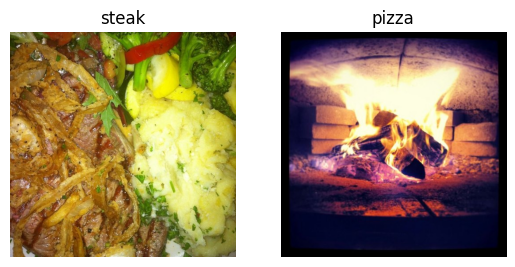

Image shape: (512, 512, 3)
Image shape: (341, 512, 3)


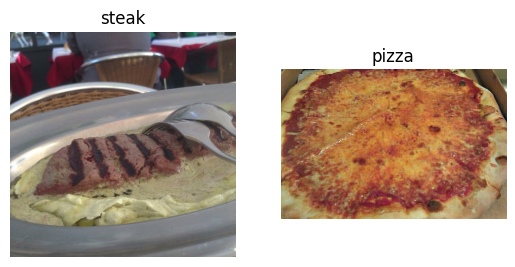

In [122]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/","pizza")

## 2. Pre-process the data(prepare it for a model)

In [123]:
# Define our directory dataset paths

train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

Our next step is to turn our data into **batches**

A batch is a small subset of the data.  Splits data into a certain number to make training easier and so as not to cause overflows.

it does this for a couple of reasons:
1. memory limitations - larger numbers may not fit on memory available
2. Trying to learn patterns in 10k images in one hit could result in the model not being able to learn very well.

why 32?

Because 32 is standard practice, although larger numbers could be useful in some cases.

In [124]:
# create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


In [125]:
# Load our image data from directories and turn into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,target_size=(224,224),class_mode="binary",batch_size=32)
test_data = test_datagen.flow_from_directory(directory=test_dir,target_size=(224,224),class_mode="binary",batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [126]:
# Get a sample of a training data batch
images, labels = train_data.next() # get next batch of images / labels in train data
len(images),len(labels)

(32, 32)

(32, 32)

In [127]:
# How many batches are there
len(train_data)

47

47

In [128]:
1500 / 32

46.875

46.875

In [129]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.69411767, 0.5686275 , 0.50980395],
          [0.69411767, 0.57254905, 0.5019608 ],
          [0.69411767, 0.5803922 , 0.50980395],
          ...,
          [0.5294118 , 0.427451  , 0.29803923],
          [0.5294118 , 0.427451  , 0.28235295],
          [0.5294118 , 0.43137258, 0.27450982]],
 
         [[0.7058824 , 0.58431375, 0.5137255 ],
          [0.69803923, 0.58431375, 0.5137255 ],
          [0.6862745 , 0.5764706 , 0.49411768],
          ...,
          [0.54509807, 0.4431373 , 0.3137255 ],
          [0.5294118 , 0.427451  , 0.2901961 ],
          [0.5294118 , 0.427451  , 0.28235295]],
 
         [[0.6862745 , 0.5764706 , 0.4901961 ],
          [0.68235296, 0.57254905, 0.4901961 ],
          [0.69411767, 0.58431375, 0.5019608 ],
          ...,
          [0.5568628 , 0.45098042, 0.33333334],
          [0.5411765 , 0.43529415, 0.31764707],
          [0.5411765 , 0.43529415, 0.31764707]],
 
         ...,
 
         [[0.7686275 , 0.5647059 , 0.41176474],
          [0.76862

(array([[[[0.02745098, 0.00784314, 0.        ],
          [0.02352941, 0.00392157, 0.        ],
          [0.02745098, 0.00784314, 0.        ],
          ...,
          [0.4666667 , 0.54509807, 0.5019608 ],
          [0.43921572, 0.5254902 , 0.4784314 ],
          [0.44705886, 0.5294118 , 0.49411768]],
 
         [[0.03137255, 0.01176471, 0.        ],
          [0.02352941, 0.00392157, 0.        ],
          [0.02352941, 0.00392157, 0.        ],
          ...,
          [0.4666667 , 0.54509807, 0.49803925],
          [0.45882356, 0.5372549 , 0.49411768],
          [0.47450984, 0.56078434, 0.5137255 ]],
 
         [[0.03137255, 0.01176471, 0.        ],
          [0.02352941, 0.00392157, 0.        ],
          [0.02352941, 0.00392157, 0.        ],
          ...,
          [0.45882356, 0.5372549 , 0.4901961 ],
          [0.45882356, 0.5372549 , 0.4901961 ],
          [0.4784314 , 0.5568628 , 0.50980395]],
 
         ...,
 
         [[0.33333334, 0.2784314 , 0.1764706 ],
          [0.35686

In [130]:
images[7].shape

(224, 224, 3)

(224, 224, 3)

In [131]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1.],
      dtype=float32)

array([0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0.,
       0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model(start with a baseline)

A baseline is a relatively simple model or existing result that you setup when you start a machine learning model which you will use as a metric when comparing to other models

**NOTE:** In deep learning there is an almost infinite amount of architectures you could create.  So one of the best ways to get started is start by using something simple and see if it works then introduce complexity as required.

In [132]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [133]:
model_4 = Sequential([Conv2D(filters=10, # Filter is the number of sliding windows going across the input
                             kernel_size=3, # The size of the sliding window going across an input
                             strides=1, # The size of the step the sliding window takes across an input
                             padding="valid", # if 'same' the output shape is same as input shape, if 'valid' output shape gets compressed
                             activation="relu",
                             input_shape=(224,224,3)), #input layer
                      Conv2D(10,3,activation="relu"),
                      Conv2D(10,3,activation="relu"),
                      Flatten(),
                      Dense(1,activation="sigmoid") # output layer 1 and sigmoid since bary
                      ])

In [134]:
model_4.compile(loss="binary_crossentropy",optimizer=Adam(),metrics=["accuracy"])

## 4. Fit the model

In [135]:
# Check the lengths of training and test generators
len(train_data), len(test_data)

(47, 16)

(47, 16)

In [136]:
# fit the model
history_4 = model_4.fit(train_data, epochs=5,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 7s 129ms/step - loss: 1.2521 - accuracy: 0.5820 - val_loss: 0.5711 - val_accuracy: 0.7620
Epoch 2/5
47/47 [==============================] - 8s 174ms/step - loss: 0.4729 - accuracy: 0.7840 - val_loss: 0.4441 - val_accuracy: 0.7960
Epoch 3/5
47/47 [==============================] - 7s 149ms/step - loss: 0.3344 - accuracy: 0.8747 - val_loss: 0.3974 - val_accuracy: 0.8260
Epoch 4/5
47/47 [==============================] - 7s 140ms/step - loss: 0.1817 - accuracy: 0.9387 - val_loss: 0.5293 - val_accuracy: 0.7640
Epoch 5/5
47/47 [==============================] - 8s 164ms/step - loss: 0.0710 - accuracy: 0.9847 - val_loss: 0.4391 - val_accuracy: 0.8000
Epoch 1/5
47/47 [==============================] - 8s 141ms/step - loss: 0.7371 - accuracy: 0.5820 - val_loss: 0.5664 - val_accuracy: 0.7100
Epoch 2/5
47/47 [==============================] - 6s 123ms/step - loss: 0.4709 - accuracy: 0.7847 - val_loss: 0.5304 - val_accuracy: 0.7340
Epoch 3/5
47/

In [137]:
model_1.evaluate(test_data)

16/16 [==============================] - 1s 84ms/step - loss: 0.2940 - accuracy: 0.8820


[0.2939590811729431, 0.8820000290870667]

16/16 [==============================] - 1s 88ms/step - loss: 0.2940 - accuracy: 0.8820


[0.2939590811729431, 0.8820000290870667]

In [138]:
model_1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_15 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_17 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 53, 53, 10)        0         
 ng2D)                                                

## 5. evaluating our model

It looks like our model is learning something, let's evaluate it.

<Axes: >

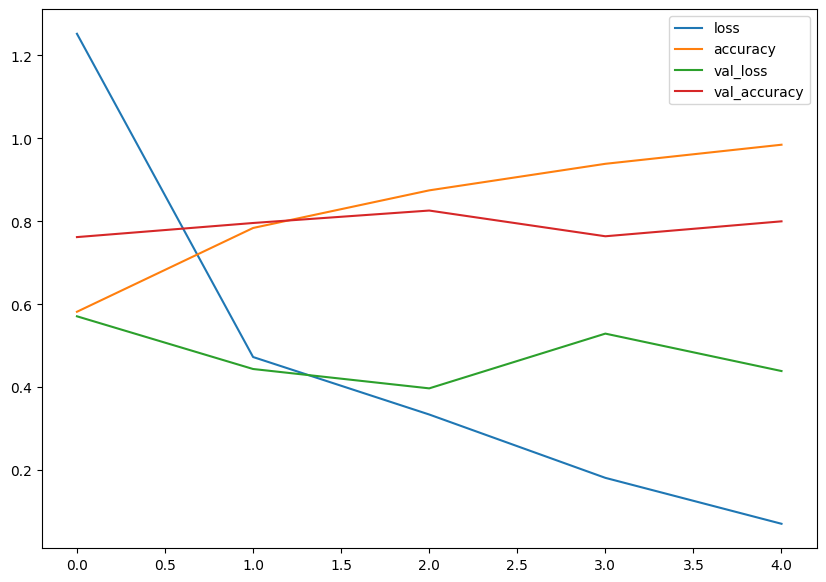

<Axes: >

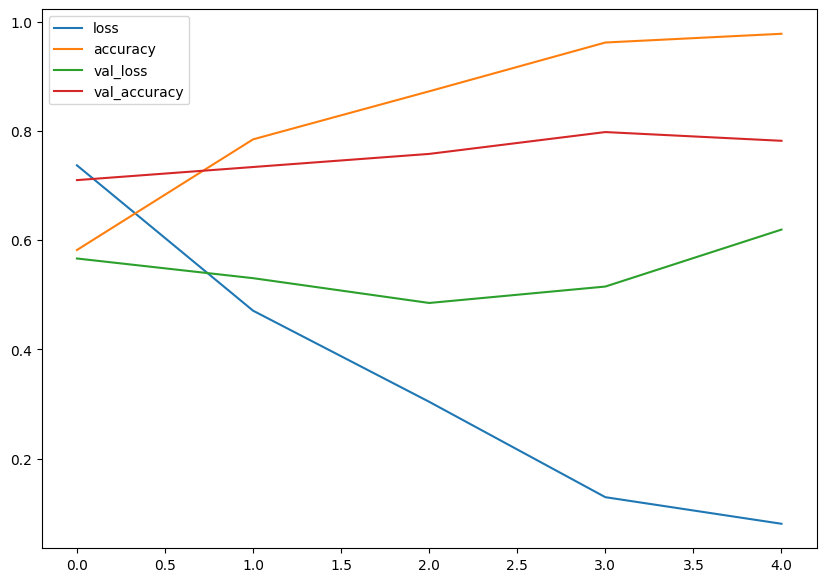

In [139]:
import pandas as pd

pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [140]:
# Plot the validation and training curves seperately

def plot_loss_curve(history):
  """
  Returns separate loss curves for training and validation loss curves
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.plot(epochs,loss,label="Training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

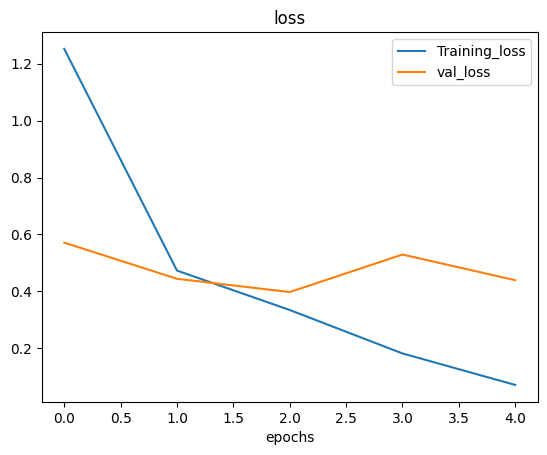

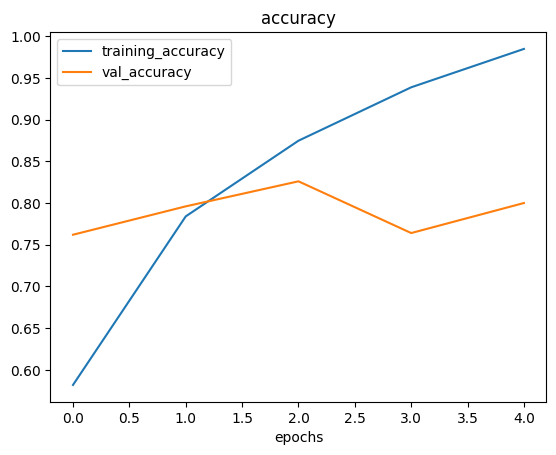

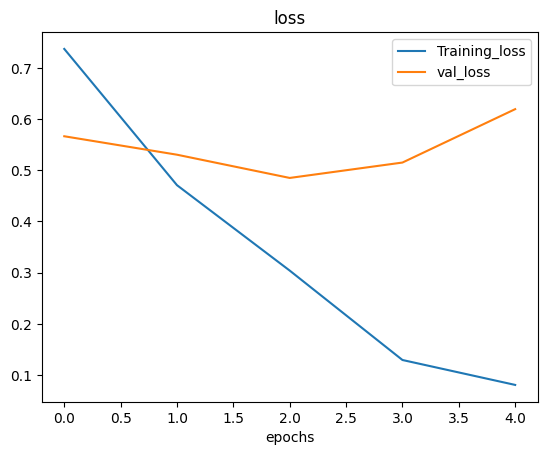

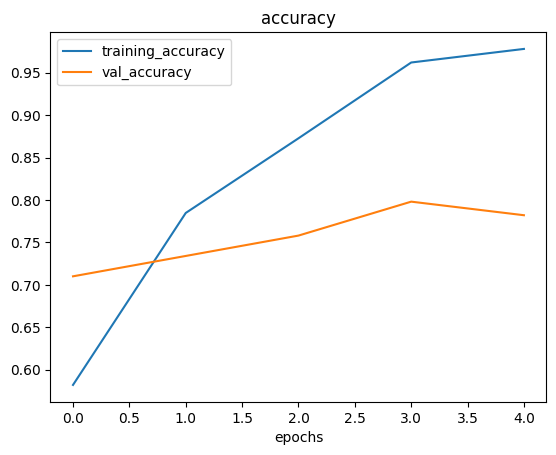

In [141]:
plot_loss_curve(history_4)

**Note:** When a model's **Validation loss starts to increase**, it's likely that the model is **Overfitting** the training dataset.  This means it's learning the patterns in the training dataset *too well* and thus the model's ability to generalize to unseen data will be diminished

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:
0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:

* Add data augmentation
* Add regularization layers(such as MaxPool2D)
* Add more data...

> **Note:** Reducing overfitting is also known as **Regularization**.

In [142]:
# Create the model(this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(10,2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

In [143]:
# compile the model
model_5.compile(loss="binary_crossentropy",optimizer=Adam(),metrics=["accuracy"])

In [144]:
history_5 = model_5.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 132ms/step - loss: 0.5961 - accuracy: 0.6767 - val_loss: 0.5030 - val_accuracy: 0.7380
Epoch 2/5
47/47 [==============================] - 6s 121ms/step - loss: 0.4209 - accuracy: 0.8267 - val_loss: 0.3108 - val_accuracy: 0.8720
Epoch 3/5
47/47 [==============================] - 5s 115ms/step - loss: 0.3703 - accuracy: 0.8413 - val_loss: 0.2810 - val_accuracy: 0.8840
Epoch 4/5
47/47 [==============================] - 6s 134ms/step - loss: 0.3605 - accuracy: 0.8413 - val_loss: 0.2699 - val_accuracy: 0.8900
Epoch 5/5
47/47 [==============================] - 7s 148ms/step - loss: 0.3445 - accuracy: 0.8627 - val_loss: 0.2724 - val_accuracy: 0.8900
Epoch 1/5
47/47 [==============================] - 8s 136ms/step - loss: 0.6283 - accuracy: 0.6480 - val_loss: 0.4543 - val_accuracy: 0.7960
Epoch 2/5
47/47 [==============================] - 7s 141ms/step - loss: 0.4366 - accuracy: 0.8120 - val_loss: 0.3408 - val_accuracy: 0.8440
Epoch 3/5
47/

In [145]:
# Get a summary of our model with max polling
model_5.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 111, 111, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 50, 50, 10)        0         
 ng2D)                                                           
                                                                 
 conv2d_24 (Conv2D)          (None, 48, 48, 10)        910       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 24, 24, 10)      

In [146]:
model_4.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_20 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_21 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_11 (Flatten)        (None, 475240)            0         
                                                                 
 dense_25 (Dense)            (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequentia

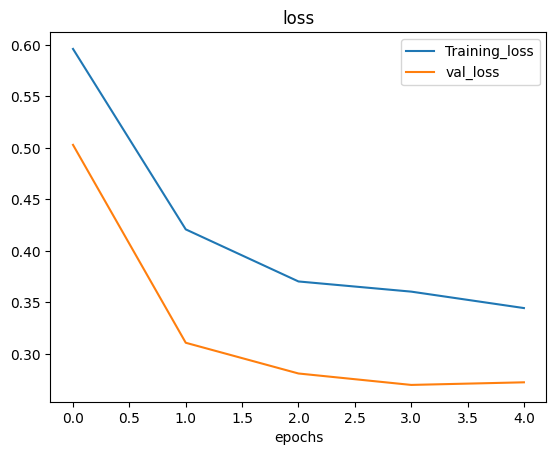

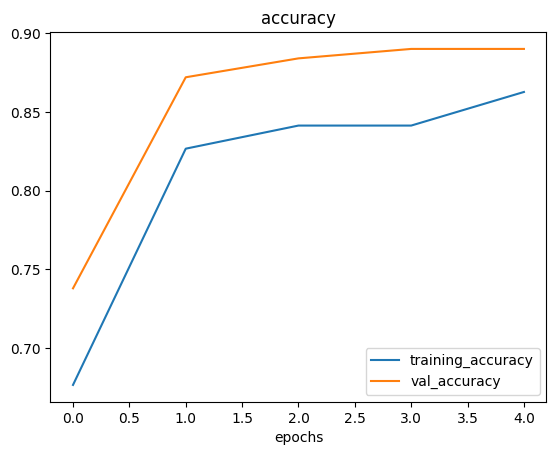

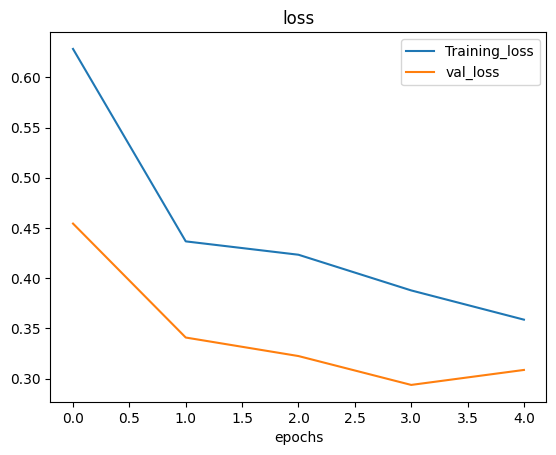

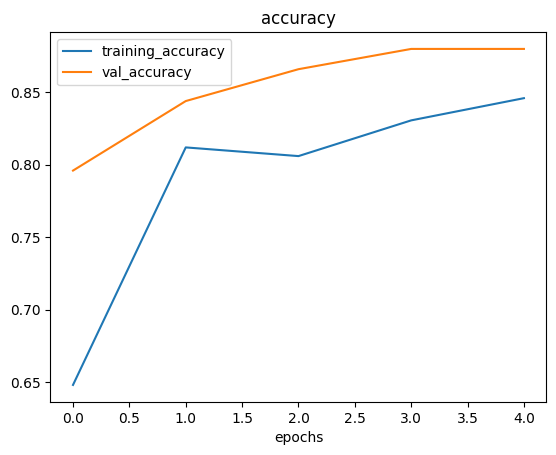

In [147]:
# Plot loss curves
plot_loss_curve(history_5)

### Opening our bag of tricks and finding data augmentation

In [148]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.02,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

# Create ImageDataGenerator without data augmentation
train_datagen=ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen=ImageDataGenerator(rescale=1/255.)

Data Augmentation modifies the image slightly to allow for more diversity in the dataset which artificially inflates it.  This allows the model to better generalise to new data.

In [149]:
# import data and augment it from training directory
print("Augmented training data")

IMG_SIZE = (224,224)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                            target_size=IMG_SIZE,
                                            batch_size=32,
                                            class_mode="binary",
                                            shuffle=False)
# create non-augmented train data batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMG_SIZE,
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

# Create non-augmented test data batches
print("Non-augmented test data: ")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data
Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Non-augmented test data: 
Found 500 images belonging to 2 classes.
Augmented training data
Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Non-augmented test data: 
Found 500 images belonging to 2 classes.


**Note:** Data augmentation is usually only performed on the training data.  Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

Finally... let's visualize some augmented data

In [150]:
# Get sample of augmented data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

showing image number: 10


(-0.5, 223.5, 223.5, -0.5)

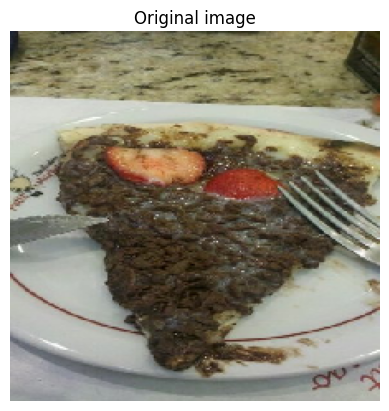

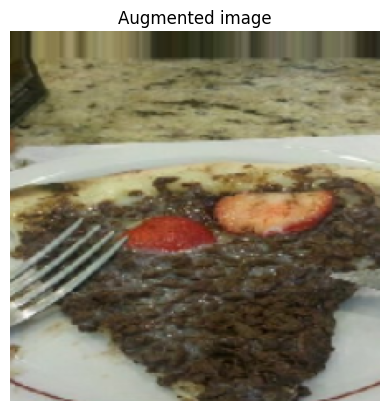

In [154]:
random_number = random.randint(1,32)
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)

Now let's try on our augmented set

In [153]:
# Create the model(this is going to be our new baseline)
model_6 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(10,2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

# compile the model
model_6.compile(loss="binary_crossentropy",optimizer=Adam(),metrics=["accuracy"])

history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 23s 461ms/step - loss: 0.7013 - accuracy: 0.4807 - val_loss: 0.6914 - val_accuracy: 0.6120
Epoch 2/5
47/47 [==============================] - 27s 577ms/step - loss: 0.6927 - accuracy: 0.5380 - val_loss: 0.6918 - val_accuracy: 0.6100
Epoch 3/5
47/47 [==============================] - 26s 564ms/step - loss: 0.6959 - accuracy: 0.5373 - val_loss: 0.6908 - val_accuracy: 0.6880
Epoch 4/5
47/47 [==============================] - 20s 435ms/step - loss: 0.6946 - accuracy: 0.5873 - val_loss: 0.6924 - val_accuracy: 0.5660
Epoch 5/5
47/47 [==============================] - 22s 454ms/step - loss: 0.6932 - accuracy: 0.5227 - val_loss: 0.6923 - val_accuracy: 0.5620


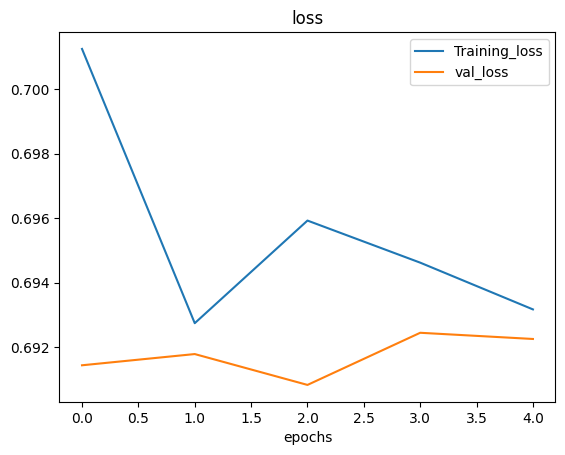

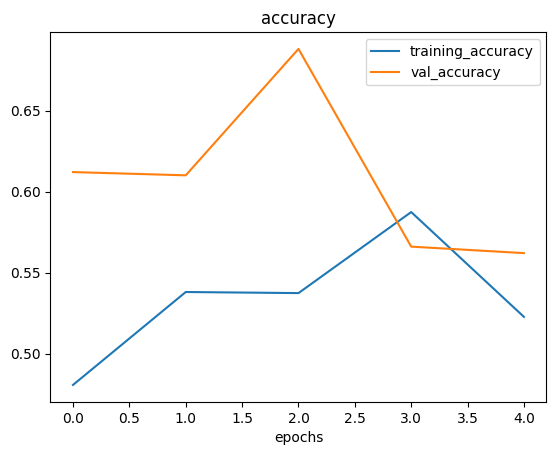

In [156]:
# Check models training curves
plot_loss_curve(history_6)

Let's shuffle our augmented training data and train another model (the same as before) on it and see what happens.

In [158]:
train_datagen_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                               target_size=(224,224),
                                                                               class_mode="binary",
                                                                               batch_size=32,
                                                                               shuffle=True)


Found 1500 images belonging to 2 classes.


In [160]:
# Create the model (same as model 5 and model 6)
# Create the model(this is going to be our new baseline)
model_7 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(10,2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

# compile the model
model_7.compile(loss="binary_crossentropy",optimizer=Adam(),metrics=["accuracy"])

history_7 = model_7.fit(train_datagen_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 24s 471ms/step - loss: 0.6839 - accuracy: 0.5800 - val_loss: 0.6138 - val_accuracy: 0.7580
Epoch 2/5
47/47 [==============================] - 21s 455ms/step - loss: 0.5894 - accuracy: 0.7067 - val_loss: 0.4138 - val_accuracy: 0.8120
Epoch 3/5
47/47 [==============================] - 21s 433ms/step - loss: 0.5042 - accuracy: 0.7513 - val_loss: 0.3471 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 22s 464ms/step - loss: 0.4797 - accuracy: 0.7733 - val_loss: 0.4137 - val_accuracy: 0.8040
Epoch 5/5
47/47 [==============================] - 21s 437ms/step - loss: 0.4467 - accuracy: 0.7967 - val_loss: 0.3487 - val_accuracy: 0.8420


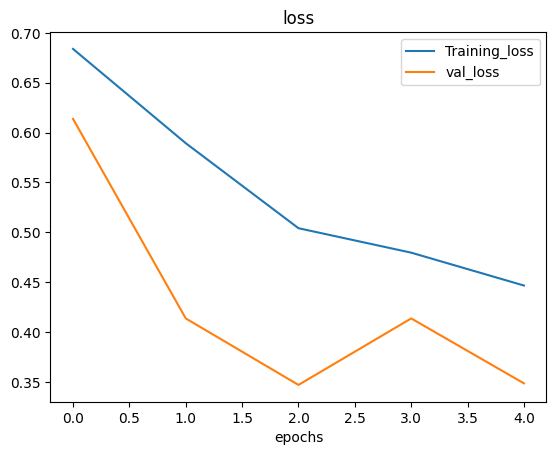

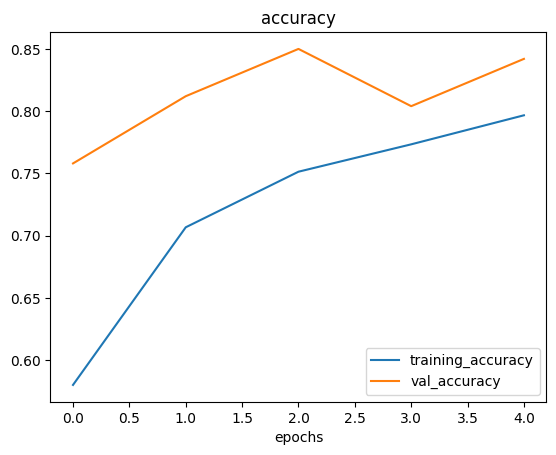

In [161]:
plot_loss_curve(history_7)